In [ ]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Has the network latency gone up since we switched internet service providers?

- Null Hypothesis:
H0 = There is no difference in network latency since internet provider switch
- Alternative Hypothesis: 
Ha = Network latency has increased 10% since internet provider switch

- True Positive: Network latency has increased 10% since the internet provider switch
- True Negative: Network latency has not changed since the internet provider switch

- Type I error (False Positive): Network latency has increased 20% since the internet provider switch, but actually there is no difference in network latency since the internet provider switch

- Type II error (False Negative): Network latency has not changed since the interenet provider switch, but actually network latency has increased 10% since the internet provider switch

# Is the website redesign any good?

- Null Hypothesis:
H0 = There is no difference in web traffic since the website design

- Alternative Hypothesis: 
Ha = There has been a 10% increase in web traffic since the website design

- True Positive: There has been a 10% increase in web traffic since the website design
- True Negative: There has not been a web traffic difference since the website design

- Type I error (False Positive): There has been a 20% increase in web traffice since the website design, but actually there has been no difference since the website design
- Type II error (False Negative): There has not been a web traffic difference since the website design, actually there has been a 10% web traffic increase since the website design

# Is our television ad driving more sales?

- Null Hypothesis:
H0 = There is no difference in sales since the television ad launch

- Alternative Hypothesis: 
Ha = There has been a 10% increase in sales since the television ad launch

- True Positive: There has been a 10% increase in sales since the television ad launch
- True Negative: There has not been a difference in sales since the television ad launch 

- Type I error (False Positive): There has been a 20% increase in sales since the television ad launch, but there has actually not been a difference in sales since the television ad launch 
- Type II error (False Negative): There has not been a difference in sales since the television ad launch, but there has actually been a 10% increase in sales since the television ad launch

# T-Test Questions

In [ ]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05


# Question 1
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- EAST = A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
-  WEST = A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- we will use a 2 sample t test (bc we want to compare the average time it takes to sell homes for it's two offices)
- we will use a 2 tailed test bc Ha = significant difference

What are we comparing? 
- Average time (numeric continuous values) to sell for two different groups (categories)
- One sample or two sample?
- One tailed ot two tailed? 

**B. Set Hypothesis**

$H_{0}$: Mean of a home sales = Mean of b home sales 
$H_{a}$: Mean of a home sales > Mean of b home sales

**C. Set Alpha**

alpha = 0.05

In [ ]:
# normal distribution = yes (over 30 samples)
# independent samples = yes
# equal variences = ? TBD
a_mean = 90
a_stddev = 15
a_pop = 40
b_mean = 100
b_stddev = 20
b_pop = 50

sitea = np.random.normal(a_mean, a_stddev, 10000)
siteb = np.random.normal(b_mean, b_stddev, 10000)

alpha = 0.05

In [ ]:
sitea.var(), siteb.var()

In [ ]:
t, p = stats.ttest_ind(sitea, siteb, equal_var = False)

In [ ]:
t, p, alpha

In [ ]:
# Is the probability greater than the alpha?
p/2 < alpha

In [ ]:
# Is there a significant difference noted in the ttest between the two houses 
# and their speed to sell homes when compared

t > 0

In [ ]:
sitea = np.random.normal(a_mean, a_stddev, a_pop)
siteb = np.random.normal(b_mean, b_stddev, b_pop)

In [ ]:
sitea, siteb

In [ ]:
# Other version to viualize two distributions: 

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [ ]:
# Using Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

α = 0.05
t, p = stats.ttest_ind_from_stats(90, 15,40,100,20,50, equal_var= False)
t, p

In [ ]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')

# Question 2

- Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [ ]:
from pydataset import data

In [ ]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)
mpg.head()

In [ ]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [ ]:
# plot distribution for fe_2008
fe_2008.hist()

In [ ]:
# plot distribution for fe_1999
fe_1999.hist()

In [ ]:
# how many observations do I have for each sample? N > 30 is normal
fe_2008.count(), fe_1999.count() 

In [ ]:
fe_2008.var(), fe_1999.var()

In [ ]:
# stats Levene test - retruns the p value, small p-value means unequal variances
# stats.levene(fe_2008, fe_1999)
stats.levene(fe_2008, fe_1999)

In [ ]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

In [ ]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')

In [ ]:
fe_2008.mean(), fe_1999.mean()

In [ ]:
plt.hist([fe_1999, fe_2008], label = ['1999 cars', '2008 cars'])
plt.legend(loc="upper right")

2. Are compact cars more fuel-efficient than the average car?
Comparing fuel economy of one group with population mean (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and p/2 < 0.05

# 2. Are compact cars more fuel-efficient than the average car?
- H0: Compact cars fuel-efficiency = average car fuel-efficiency
- Ha: Compact car fuel-efficiency > average car fuel-efficiency

    for Ha to be true, t>0 and p/2 <0.05

In [ ]:
mpg['transmission'] = np.where(mpg.trans.str.count('auto'), 'automatic', 'manual')
mpg

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

In [ ]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

fe_compact.hist()

In [ ]:
#calculate t and p values: 
t, p = stats.ttest_1samp(fe_compact, μ)
t, p

In [ ]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')

#  3. Do manual cars get better gas mileage than automatic cars?
- One-sample or two-sample t test?
- 1-tailed or 2-tailed?
$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars
$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [ ]:
#distribution
fe_auto.hist()

In [ ]:
#distribution
fe_manual.hist()

In [ ]:
# looking at the variances
fe_auto.var(), fe_manual.var()

In [ ]:
# # # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_auto, fe_manual)

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = False)
t, p/2, alpha

In [ ]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')

In [ ]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [ ]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation Lesson Exercises

- Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [15]:
# imports
# data load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data


In [16]:
df = pd.read_csv('Cust_Churn_Telco.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Total charges? 
- What happens if you control for phone and internet service?

In [23]:
# Calculating correlation between tenure and monthly charges and tenure: total charges

In [24]:
ys = [df.MonthlyCharges, df.TotalCharges]
for y in ys:
    x = df['tenure']
    r, p = stats.pearsonr(x, y)
    print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
    if p < 0.05:
          print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.24789985628615002 with a p value of 4.0940449915016345e-99
 p is less than our alpha and we can reject the null hypothesis
Pearson Correlation is calculated at 0.3896319744941455 with a p value of 4.382201025264291e-254
 p is less than our alpha and we can reject the null hypothesis


In [25]:
# separate phone and internet service into new x and y's

In [26]:
# visualize it the first time around:

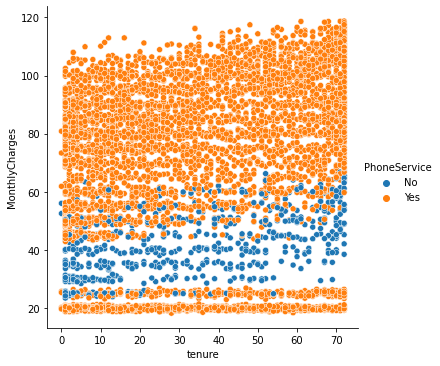

In [28]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService', data=df)

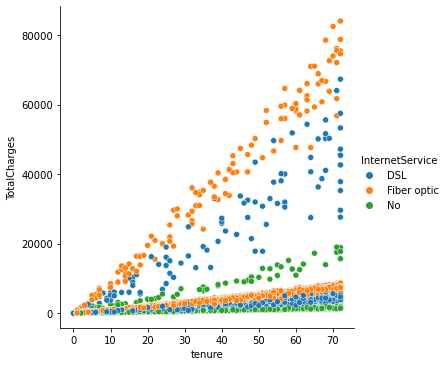

In [30]:
sns.relplot(x = 'tenure', y = 'TotalCharges', hue='InternetService', data=df)

# 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [33]:
# imports
# data load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data

In [34]:
# Connecting to the employees database
from env import host, username, password

In [35]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
query = '''

SELECT * 
FROM employees 
JOIN salaries on employees.emp_no = salaries.emp_no

'''

In [37]:
employees = pd.read_sql(query, url)

In [ ]:
employees.head()

In [ ]:
type(employees)

In [ ]:
employees.info()

In [ ]:
employees['to_date'] = pd.to_datetime(employees['to_date'])
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

In [ ]:
employees['to_date'] = pd.to_datetime(employees)

In [ ]:
#-----------------------#

In [ ]:
# set up queries:

qr = '''SELECT e.*, s.salary, t.title FROM employees AS e 
JOIN titles AS t ON e.emp_no = t.emp_no
JOIN salaries as s ON t.emp_no = s.emp_no;'''


In [51]:
query = 'SELECT * from employees'
query2 = 'SELECT * from salaries'
query3 = 'SELECT * from titles'

In [45]:
#setting the get_connection as a function for the connection to the SQL

from env import username,password,host
from sqlalchemy import create_engine
def get_connection(db, username, host, password):
    url = f'mysql+pymysql://{username}:{password}@{host}/{db}'
    return create_engine(url)
db='employee'

In [46]:
# get the connection to the SQL 
conn = get_connection('employees', username, host, password)

In [47]:
#get employees, salaries, titles

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
employees = pd.read_sql(query, conn)
salaries = pd.read_sql(query2, conn)
titles = pd.read_sql(query3, conn)

In [ ]:
# aggregate titles by employee number:

In [55]:
countref = titles.groupby('emp_no').count()[['title']].rename(columns={'title': 'titlecount'})

In [56]:
# join the above to titles

In [57]:
merged = pd.merge(titles, countref, how='left', on='emp_no')

In [58]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   title       443308 non-null  object
 2   from_date   443308 non-null  object
 3   to_date     443308 non-null  object
 4   titlecount  443308 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 20.3+ MB


In [59]:
# convert the from and to dates to pandas datetimes so we can subtract them:

In [60]:
#on purpose not supposed to work:
merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

<ipython-input-60-fa881b3429af>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))


In [61]:
merged['from_date'] = merged['from_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

In [62]:
merged['tenure'] = (merged.to_date - merged.from_date).astype(int)

In [63]:
#now join it to the original employees dataframe after converting to the pandas datetimes

In [64]:
merged = pd.merge(employees, merged, how='left', on='emp_no')

In [65]:
# and join that to salaries so we ahve all our data in one place

In [67]:
merged_sal = pd.merge(merged,salaries, how='left', on='emp_no')

In [68]:
#check for nulls in the dataframe

In [69]:
merged_sal[['tenure', 'salary']].isnull().values.any()

False

In [ ]:
# save it so you don't neeed to do all that again
# merged_sal.to_csv('merged_sal.csv')

In [ ]:
# correlation for tenure vs salary?

Pearson Correlation is calculated at 0.027 with a p value of 0.000
 p is less than our aplha and we can reject the null hypothesis


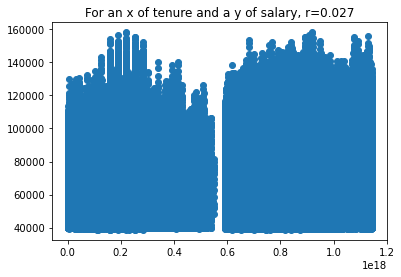

In [71]:
r, p = stats.pearsonr(merged_sal['tenure'], merged_sal['salary'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our aplha and we can reject the null hypothesis')

plt.title(f'For an x of tenure and a y of salary, r={r:.3f}')
plt.scatter(merged_sal['tenure'], merged_sal['salary'])

In [ ]:
# correlation for tenure vs number of titles held?

In [74]:
r, p =  stats.pearsonr(m2['tenure'], m2['titlecount'])

NameError: name 'm2' is not defined

Pearson Correlation is calculated at 0.027 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


NameError: name 'm2' is not defined

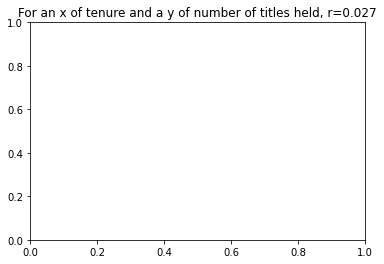

In [75]:
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
plt.title(f'For an x of tenure and a y of number of titles held, r={r:.3f}')
plt.scatter(m2['tenure'], m2['titlecount'])

# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [76]:
# get the data:
from pydataset import data
df = data('sleepstudy')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [79]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [80]:
x = df.Days
y = df.Reaction

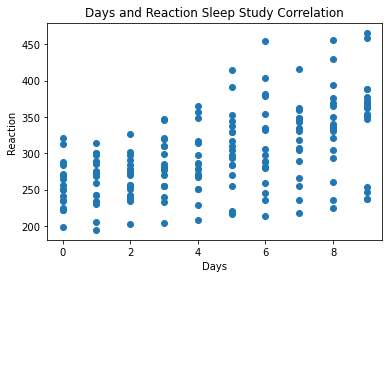

In [81]:
plt.scatter(x, y)
plt.xlabel('Days')
plt.ylabel('Reaction')
plt.title('Days and Reaction Sleep Study Correlation')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat:{stats.pearsonr(x,y)[1]:.2f}', xy=(1,5))
plt.show()

In [82]:
r, p = stats.pearsonr(df.Days, df.Reaction)

In [83]:
r

0.5352302262650253

In [84]:
p

9.894096322214812e-15